In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sms
import json
import optuna
import plotly

from IPython.display import display
from IPython.display import Markdown as md
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def f():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    
def nf():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', 4)
nf()
import warnings
warnings.filterwarnings('ignore')

def dp(df, r = 5, c = None):
    from IPython.display import display
    with pd.option_context('display.max_rows', 4, 'display.max_columns', None):
        display(df)

def fg(w = 6, h = 4, dpi = 120):
    plt.rcParams['figure.figsize'] = (w,h)
    plt.rcParams['figure.dpi'] = dpi
fg()

# import autotime
# %load_ext autoreload
# %autoreload 2
# %load_ext autotime

# For dark themes 
from jupyterthemes import jtplot
jtplot.style()

# Para quando tiver atualização de submodulos
%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv("data/UCI_Credit_Card.csv")

df.columns = df.columns.str.lower()

df = df.drop('id', axis = 1)

df = df.rename(columns = {'default.payment.next.month':'target'})

! ls

df.to_parquet('data/df_to_feature_selection.parquet', index = False)

_01_dataprep.ipynb
_02_model_with_average_precision_feature_selection.ipynb
_03_lightgbm_model_tuning_parameters.ipynb
_04_lightgbm_model_tuning_parameters_multiobjective.ipynb
baseparams.json
bestparams.json
data
feature_selector
libs
lightbmparameters.txt


# LGBM

In [3]:
import lightgbm as lgb

In [4]:
from libs.pipeline import Pipe

# Optuna

In [5]:
# split    
from sklearn.model_selection import train_test_split
def split(df, target_var:str, test_size:float=0.3):

    X = df.drop(target_var, axis = 1)
    y = df[target_var]
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size = test_size,
                                                        random_state = 42)
    return X_train, X_test, y_train, y_test

In [6]:
clf = lgb.LGBMClassifier(max_depth = 6)
ma = Pipe(df = df, model = clf, target_var = 'target')
ma.popin.scores
ma.oos.scores
ma.metrics()
ma.overfitting

,accuracy,precision,recall,f1,auc,gini
0,0.84,0.75,0.43,0.55,0.87,0.74


,accuracy,precision,recall,f1,auc,gini
0,0.82,0.67,0.36,0.47,0.77,0.54


,accuracy,precision,recall,f1,auc,gini
0,0.02,0.08,0.07,0.08,0.1,0.2


In [8]:
from libs.multituning import Tuning

In [9]:
df

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,target
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29998,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,50000.0,1,2,1,46,0,0,0,0,0,0,47929.0,48905.0,49764.0,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [45]:
tuning = Tuning(df,
                target_var = 'target', 
                n_trials = 100,
                direction='maximize')

[I 2021-10-05 23:18:13,150] A new study created in memory with name: no-name-1eeccd43-9a8f-4edf-aec7-50ccca5c1e3b


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=25, reg_alpha=0.0 will be ignored. Current value: lambda_l1=25
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=110, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=110
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=70, reg_lambda=0.0 will be ignored. Current value: lambda_l2=70
[LightGBM] [Warning] min_gain_to_split is set=13.161017605130159, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.161017605130159


[I 2021-10-05 23:18:13,659] Trial 0 finished with value: -2465709.9000000004 and parameters: {'boosting': 'dart', 'device_type': 'cpu', 'colsample_bytree': 1.0, 'n_estimators': 50, 'learning_rate': 0.09999999999999999, 'num_leaves': 25, 'max_depth': 7, 'min_data_in_leaf': 110, 'min_child_weight': 0.0006100000000000001, 'max_bin': 367, 'lambda_l1': 25, 'lambda_l2': 70, 'min_gain_to_split': 13.161017605130159, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 0 with value: -2465709.9000000004.


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.2 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] lambda_l1 is set=55, reg_alpha=0.0 will be ignored. Current value: lambda_l1=55
[LightGBM] [Warning] bagging_fraction is set=0.30000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=55, reg_lambda=0.0 will be ignored. Current value: lambda_l2=55
[LightGBM] [Warning] min_gain_to_split is set=0.07172244476998102, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.07172244476998102


[I 2021-10-05 23:18:15,500] Trial 1 finished with value: -2395181.55 and parameters: {'boosting': 'dart', 'device_type': 'cpu', 'colsample_bytree': 1.2, 'n_estimators': 110, 'learning_rate': 0.03, 'num_leaves': 40, 'max_depth': 4, 'min_data_in_leaf': 90, 'min_child_weight': 0.00021, 'max_bin': 295, 'lambda_l1': 55, 'lambda_l2': 55, 'min_gain_to_split': 0.07172244476998102, 'bagging_fraction': 0.30000000000000004, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 1 with value: -2395181.55.


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.1 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=150, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=150
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=45, reg_lambda=0.0 will be ignored. Current value: lambda_l2=45
[LightGBM] [Warning] min_gain_to_split is set=10.596499521340148, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.596499521340148


[I 2021-10-05 23:18:18,630] Trial 2 finished with value: -2539753.65 and parameters: {'boosting': 'dart', 'device_type': 'cpu', 'colsample_bytree': 1.1, 'n_estimators': 200, 'learning_rate': 0.15000000000000002, 'num_leaves': 25, 'max_depth': 9, 'min_data_in_leaf': 150, 'min_child_weight': 0.00031000000000000005, 'max_bin': 192, 'lambda_l1': 5, 'lambda_l2': 45, 'min_gain_to_split': 10.596499521340148, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 1 with value: -2395181.55.


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.4 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] bagging_fraction is set=0.2, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] min_gain_to_split is set=8.095999915130907, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.095999915130907


[I 2021-10-05 23:18:20,154] Trial 3 finished with value: -2351139.85 and parameters: {'boosting': 'dart', 'device_type': 'cpu', 'colsample_bytree': 1.4, 'n_estimators': 200, 'learning_rate': 0.16, 'num_leaves': 20, 'max_depth': 12, 'min_data_in_leaf': 70, 'min_child_weight': 0.00091, 'max_bin': 272, 'lambda_l1': 15, 'lambda_l2': 20, 'min_gain_to_split': 8.095999915130907, 'bagging_fraction': 0.2, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 3 with value: -2351139.85.


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.1 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.2, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=90, reg_lambda=0.0 will be ignored. Current value: lambda_l2=90
[LightGBM] [Warning] min_gain_to_split is set=0.1912599139321408, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1912599139321408


[I 2021-10-05 23:18:22,078] Trial 4 finished with value: -2459814.4000000004 and parameters: {'boosting': 'dart', 'device_type': 'cpu', 'colsample_bytree': 1.1, 'n_estimators': 120, 'learning_rate': 0.19, 'num_leaves': 40, 'max_depth': 6, 'min_data_in_leaf': 60, 'min_child_weight': 0.00031000000000000005, 'max_bin': 182, 'lambda_l1': 5, 'lambda_l2': 90, 'min_gain_to_split': 0.1912599139321408, 'bagging_fraction': 0.2, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 3 with value: -2351139.85.
[I 2021-10-05 23:18:22,169] Trial 5 pruned. Trial was pruned at iteration 0.
[I 2021-10-05 23:18:22,296] Trial 6 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.3 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] lambda_l1 is set=65, reg_alpha=0.0 will be ignored. Current value: lambda_l1=65
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=130, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=130
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] min_gain_to_split is set=13.615480657511787, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.615480657511787


[I 2021-10-05 23:18:22,416] Trial 7 pruned. Trial was pruned at iteration 0.
[I 2021-10-05 23:18:22,545] Trial 8 pruned. Trial was pruned at iteration 6.
[I 2021-10-05 23:18:22,635] Trial 9 pruned. Trial was pruned at iteration 0.
[I 2021-10-05 23:18:22,765] Trial 10 pruned. Trial was pruned at iteration 0.
[I 2021-10-05 23:18:22,897] Trial 11 pruned. Trial was pruned at iteration 0.
[I 2021-10-05 23:18:23,085] Trial 12 pruned. Trial was pruned at iteration 0.
[I 2021-10-05 23:18:23,300] Trial 13 pruned. Trial was pruned at iteration 0.
[I 2021-10-05 23:18:23,466] Trial 14 pruned. Trial was pruned at iteration 0.
[I 2021-10-05 23:18:23,691] Trial 15 pruned. Trial was pruned at iteration 0.
[I 2021-10-05 23:18:23,881] Trial 16 pruned. Trial was pruned at iteration 0.
[I 2021-10-05 23:18:23,993] Trial 17 pruned. Trial was pruned at iteration 1.
[I 2021-10-05 23:18:24,112] Trial 18 pruned. Trial was pruned at iteration 0.
[I 2021-10-05 23:18:24,260] Trial 19 pruned. Trial was pruned at it

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.1 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=9.024052097865685, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.024052097865685


[I 2021-10-05 23:18:35,151] Trial 44 finished with value: -2477111.95 and parameters: {'boosting': 'dart', 'device_type': 'cpu', 'colsample_bytree': 1.1, 'n_estimators': 200, 'learning_rate': 0.12, 'num_leaves': 15, 'max_depth': 10, 'min_data_in_leaf': 120, 'min_child_weight': 0.00031000000000000005, 'max_bin': 101, 'lambda_l1': 10, 'lambda_l2': 0, 'min_gain_to_split': 9.024052097865685, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 3 with value: -2351139.85.


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=7.516055905865783, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.516055905865783


[I 2021-10-05 23:18:36,825] Trial 45 finished with value: -2482274.9500000007 and parameters: {'boosting': 'dart', 'device_type': 'cpu', 'colsample_bytree': 1.0, 'n_estimators': 170, 'learning_rate': 0.12, 'num_leaves': 15, 'max_depth': 10, 'min_data_in_leaf': 120, 'min_child_weight': 0.00011, 'max_bin': 158, 'lambda_l1': 10, 'lambda_l2': 0, 'min_gain_to_split': 7.516055905865783, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 3 with value: -2351139.85.
[I 2021-10-05 23:18:36,956] Trial 46 pruned. Trial was pruned at iteration 0.
[I 2021-10-05 23:18:37,081] Trial 47 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.2 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=85, reg_alpha=0.0 will be ignored. Current value: lambda_l1=85
[LightGBM] [Warning] bagging_fraction is set=0.30000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=110, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=110
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] min_gain_to_split is set=7.756408189936999, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.756408189936999


[I 2021-10-05 23:18:37,227] Trial 48 pruned. Trial was pruned at iteration 0.
[I 2021-10-05 23:18:37,364] Trial 49 pruned. Trial was pruned at iteration 0.
[I 2021-10-05 23:18:37,507] Trial 50 pruned. Trial was pruned at iteration 0.
[I 2021-10-05 23:18:39,155] Trial 51 finished with value: -2476071.1500000004 and parameters: {'boosting': 'dart', 'device_type': 'cpu', 'colsample_bytree': 1.1, 'n_estimators': 200, 'learning_rate': 0.15000000000000002, 'num_leaves': 15, 'max_depth': 8, 'min_data_in_leaf': 130, 'min_child_weight': 0.00031000000000000005, 'max_bin': 103, 'lambda_l1': 5, 'lambda_l2': 5, 'min_gain_to_split': 8.65868279645641, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 3 with value: -2351139.85.


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.1 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] min_gain_to_split is set=8.008748388879264, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.008748388879264


[I 2021-10-05 23:18:41,123] Trial 52 finished with value: -2466690.5 and parameters: {'boosting': 'dart', 'device_type': 'cpu', 'colsample_bytree': 1.1, 'n_estimators': 200, 'learning_rate': 0.13, 'num_leaves': 15, 'max_depth': 8, 'min_data_in_leaf': 120, 'min_child_weight': 0.00031000000000000005, 'max_bin': 119, 'lambda_l1': 0, 'lambda_l2': 5, 'min_gain_to_split': 8.008748388879264, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 3 with value: -2351139.85.


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.2 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=140, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=140
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] min_gain_to_split is set=8.06670043995284, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.06670043995284


[I 2021-10-05 23:18:42,675] Trial 53 finished with value: -2477073.6500000004 and parameters: {'boosting': 'dart', 'device_type': 'cpu', 'colsample_bytree': 1.2, 'n_estimators': 180, 'learning_rate': 0.14, 'num_leaves': 10, 'max_depth': 8, 'min_data_in_leaf': 140, 'min_child_weight': 0.00041000000000000005, 'max_bin': 112, 'lambda_l1': 0, 'lambda_l2': 10, 'min_gain_to_split': 8.06670043995284, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 3 with value: -2351139.85.
[I 2021-10-05 23:18:42,797] Trial 54 pruned. Trial was pruned at iteration 1.
[I 2021-10-05 23:18:42,912] Trial 55 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.1 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=130, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=130
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] min_gain_to_split is set=6.208563343386065, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.208563343386065


[I 2021-10-05 23:18:43,029] Trial 56 pruned. Trial was pruned at iteration 0.
[I 2021-10-05 23:18:43,145] Trial 57 pruned. Trial was pruned at iteration 0.
[I 2021-10-05 23:18:43,279] Trial 58 pruned. Trial was pruned at iteration 0.
[I 2021-10-05 23:18:43,396] Trial 59 pruned. Trial was pruned at iteration 0.
[I 2021-10-05 23:18:43,512] Trial 60 pruned. Trial was pruned at iteration 0.
[I 2021-10-05 23:18:45,164] Trial 61 finished with value: -2476221.3500000006 and parameters: {'boosting': 'dart', 'device_type': 'cpu', 'colsample_bytree': 1.3, 'n_estimators': 190, 'learning_rate': 0.14, 'num_leaves': 10, 'max_depth': 8, 'min_data_in_leaf': 130, 'min_child_weight': 0.00041000000000000005, 'max_bin': 122, 'lambda_l1': 0, 'lambda_l2': 10, 'min_gain_to_split': 7.770808599114548, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 3 with value: -2351139.85.
[I 2021-10-05 23:18:45,281] Trial 62 pruned. Trial was pruned at iteration 0.
[I 2021-10-05 23:18:45,

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.4 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] min_gain_to_split is set=7.777677907412101, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.777677907412101


[I 2021-10-05 23:18:45,572] Trial 64 pruned. Trial was pruned at iteration 10.
[I 2021-10-05 23:18:45,695] Trial 65 pruned. Trial was pruned at iteration 0.
[I 2021-10-05 23:18:47,945] Trial 66 finished with value: -2458036.05 and parameters: {'boosting': 'dart', 'device_type': 'cpu', 'colsample_bytree': 1.3, 'n_estimators': 190, 'learning_rate': 0.17, 'num_leaves': 10, 'max_depth': 8, 'min_data_in_leaf': 80, 'min_child_weight': 0.00031000000000000005, 'max_bin': 109, 'lambda_l1': 0, 'lambda_l2': 0, 'min_gain_to_split': 1.5334118933072922, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 3 with value: -2351139.85.
[I 2021-10-05 23:18:48,050] Trial 67 pruned. Trial was pruned at iteration 0.
[I 2021-10-05 23:18:48,166] Trial 68 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.1 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l1 is set=55, reg_alpha=0.0 will be ignored. Current value: lambda_l1=55
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=0.5073178837954, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.5073178837954


[I 2021-10-05 23:18:48,282] Trial 69 pruned. Trial was pruned at iteration 0.
[I 2021-10-05 23:18:48,400] Trial 70 pruned. Trial was pruned at iteration 0.
[I 2021-10-05 23:18:48,516] Trial 71 pruned. Trial was pruned at iteration 0.
[I 2021-10-05 23:18:48,631] Trial 72 pruned. Trial was pruned at iteration 0.
[I 2021-10-05 23:18:48,747] Trial 73 pruned. Trial was pruned at iteration 0.
[I 2021-10-05 23:18:48,869] Trial 74 pruned. Trial was pruned at iteration 1.
[I 2021-10-05 23:18:48,995] Trial 75 pruned. Trial was pruned at iteration 1.
[I 2021-10-05 23:18:49,113] Trial 76 pruned. Trial was pruned at iteration 0.
[I 2021-10-05 23:18:49,231] Trial 77 pruned. Trial was pruned at iteration 0.
[I 2021-10-05 23:18:49,350] Trial 78 pruned. Trial was pruned at iteration 0.
[I 2021-10-05 23:18:49,480] Trial 79 pruned. Trial was pruned at iteration 0.
[I 2021-10-05 23:18:49,598] Trial 80 pruned. Trial was pruned at iteration 0.
[I 2021-10-05 23:18:49,746] Trial 81 pruned. Trial was pruned at

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.3 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=55, reg_alpha=0.0 will be ignored. Current value: lambda_l1=55
[LightGBM] [Warning] bagging_fraction is set=0.30000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=130, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=130
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] min_gain_to_split is set=0.6636169049465163, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.6636169049465163


In [46]:
bestparams = tuning.study.best_params

In [47]:
baseparams = ma.model.get_params()

In [48]:
from libs.pipeline import Pipe
best = lgb.LGBMClassifier().set_params(**bestparams)

mbest = Pipe(df, target_var = 'target', model = best)

mbest.popin.scores

mbest.oos.scores

,accuracy,precision,recall,f1,auc,gini
0,0.77,0.33,0.07,0.11,0.5,0.0


,accuracy,precision,recall,f1,auc,gini
0,0.76,0.36,0.08,0.13,0.51,0.02


In [49]:
from libs.pipeline import Pipe
base = lgb.LGBMClassifier().set_params(**baseparams)

mbase = Pipe(df, target_var = 'target', model = base)

mbase.popin.scores

mbase.oos.scores

,accuracy,precision,recall,f1,auc,gini
0,0.84,0.76,0.42,0.54,0.87,0.74


,accuracy,precision,recall,f1,auc,gini
0,0.82,0.67,0.38,0.48,0.79,0.58


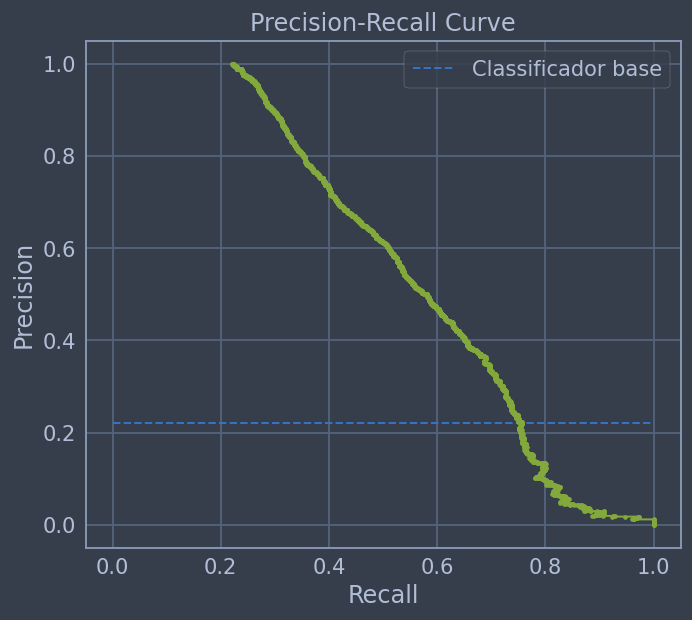

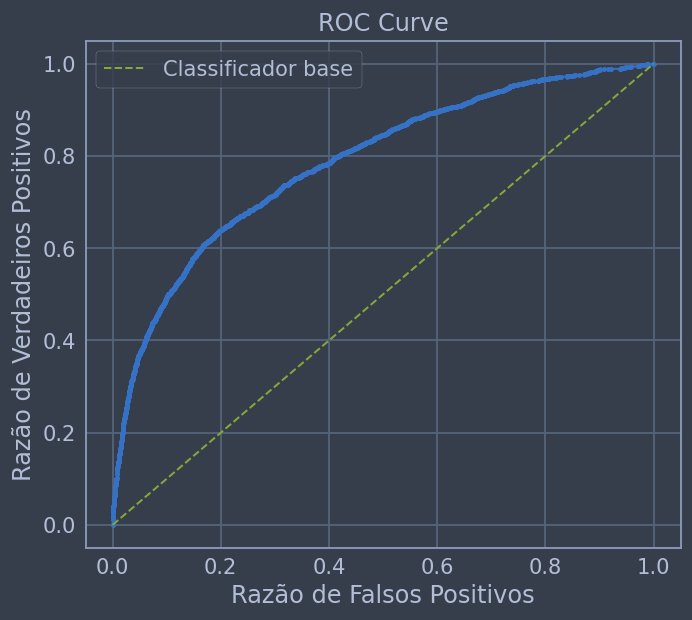

In [50]:
mbase.oos.charts

In [51]:
optuna.visualization.plot_param_importances(tuning.study)

In [52]:
optuna.visualization.plot_optimization_history(tuning.study)

In [53]:
optuna.visualization.plot_intermediate_values(tuning.study)

In [42]:
optuna.visualization.plot_slice(tuning.study)

In [43]:
optuna.visualization.plot_contour(tuning.study)

[W 2021-10-05 23:16:02,677] Param bagging_freq unique value length is less than 2.
[W 2021-10-05 23:16:02,847] Param device_type unique value length is less than 2.
[W 2021-10-05 23:16:03,392] Param bagging_freq unique value length is less than 2.
[W 2021-10-05 23:16:03,456] Param bagging_freq unique value length is less than 2.
[W 2021-10-05 23:16:03,496] Param bagging_freq unique value length is less than 2.
[W 2021-10-05 23:16:03,524] Param bagging_freq unique value length is less than 2.
[W 2021-10-05 23:16:03,571] Param bagging_freq unique value length is less than 2.
[W 2021-10-05 23:16:03,603] Param bagging_freq unique value length is less than 2.
[W 2021-10-05 23:16:03,632] Param bagging_freq unique value length is less than 2.
[W 2021-10-05 23:16:03,663] Param bagging_freq unique value length is less than 2.
[W 2021-10-05 23:16:03,703] Param bagging_freq unique value length is less than 2.
[W 2021-10-05 23:16:03,743] Param bagging_freq unique value length is less than 2.
[W 20

In [44]:
optuna.visualization.plot_parallel_coordinate(tuning.study)